# **NLP Project 2 : Supervised Learning**
## Léo RINGEISSEN and Santiago MARTIN

# Data Loading and Cleaning

## Loading the excel files

In [1]:
import pandas as pd
import glob

# Step 1: Gather all Excel file paths
file_paths = glob.glob("Traduction avis clients/*.xlsx")

# Step 2: Load and combine files
dataframes = []
for file in file_paths:
    df = pd.read_excel(file)
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Select relevant columns
selected_columns = ["note", "produit", "type", "avis_en"]  # French column names
combined_df = combined_df[selected_columns]

# Rename columns to English
combined_df.columns = ["rating", "rating", "type", "review"]

## Manual Translation of `rating` Column

In [2]:
# Correct product translations
product_translations = {
    "animaux": "animals",
    "auto": "car",
    "credit": "credit",
    "garantie-decennale": "ten-year warranty",
    "habitation": "home",
    "moto": "motorcycle",
    "multirisque-professionnelle": "professional multi-risk",
    "prevoyance": "accidental injury",
    "responsabilite-civile-professionnelle": "professional liability",
    "sante": "health",
    "vie": "life"
}

# Apply translations to `product` column
combined_df["product"] = combined_df["product"].map(product_translations)

## Cleaning English Reviews

In [3]:
# Remove faulty reviews and clean the text
combined_df["review"] = (
    combined_df["review"]
    .str.replace(r"\s+", " ", regex=True)  # Replace extra spaces and newlines with a single space
    .str.strip()  # Remove leading/trailing spaces
)

# Filter out rows with "Loading..."
combined_df = combined_df[~combined_df["review"].str.contains("Loading...", na=False)]

## Removing null values (focus on ratings)

In [4]:
print(combined_df.isnull().sum())
combined_df.dropna(inplace=True)
print(combined_df.isnull().sum())

rating     9782
product      16
type          0
review        2
dtype: int64
rating     0
product    0
type       0
review     0
dtype: int64


## Summary of Cleaned Data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### Data Shape and Appearance

In [6]:
print("Total rows and columns:", combined_df.shape)
print("\nSample data:")
display(combined_df.head())

Total rows and columns: (23539, 4)

Sample data:


,rating,product,type,review
0,4.0,car,train,The person on the phone was clear and friendly...
1,4.0,motorcycle,train,"Satisfied. Reactivity, simplicity. Attractive ..."
2,1.0,life,train,"Insurer to flee, does not ensure its responsib..."
3,1.0,home,train,The GMF has been waiting for a water damage fo...
4,3.0,car,train,I am good with this insurance. She is practica...


### Data Exportation

In [7]:
combined_df.to_csv("combined_reviews.csv", index=False)

### Data Distributions


Unique ratings and counts:
rating
1.0    7094
4.0    4771
5.0    4745
2.0    3635
3.0    3294
Name: count, dtype: int64


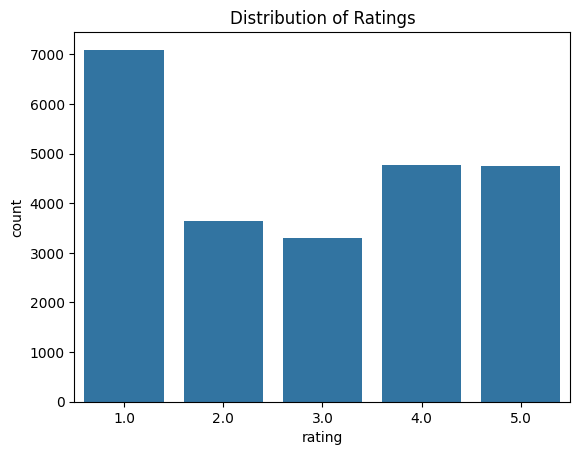

In [8]:
print("\nUnique ratings and counts:")
print(combined_df["rating"].value_counts())

sns.countplot(x="rating", data=combined_df)
plt.title("Distribution of Ratings")
plt.show()


Unique product categories and counts:
product
car                        13745
health                      3443
motorcycle                  2063
home                        1922
accidental injury            768
credit                       640
life                         559
animals                      364
professional multi-risk       19
ten-year warranty             11
professional liability         5
Name: count, dtype: int64


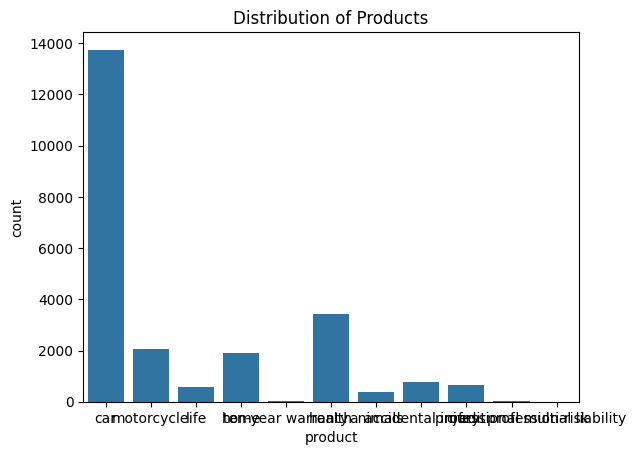

In [9]:
print("\nUnique product categories and counts:")
print(combined_df["product"].value_counts())

sns.countplot(x="product", data=combined_df)
plt.title("Distribution of Products")
plt.show()


Count of products per rating:
rating  product                
1.0     car                        2948
        health                     1381
        home                       1054
        accidental injury           506
        life                        395
        motorcycle                  309
        credit                      265
        animals                     214
        ten-year warranty             9
        professional multi-risk       8
        professional liability        5
2.0     car                        2049
        home                        526
        health                      431
        motorcycle                  264
        accidental injury           115
        credit                       95
        life                         84
        animals                      70
        professional multi-risk       1
3.0     car                        2096
        health                      522
        motorcycle                  263
        home     

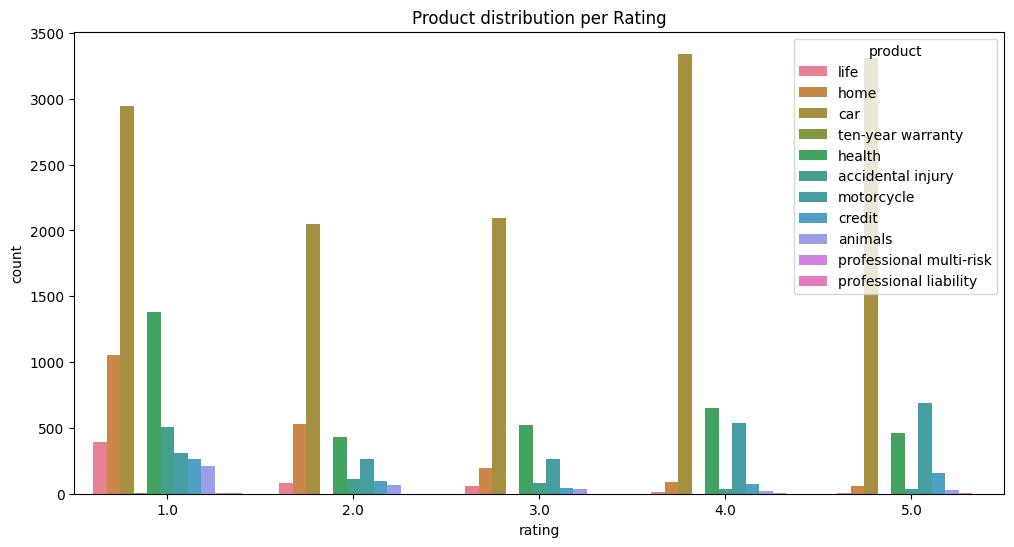

In [10]:
print("\nCount of products per rating:")
print(combined_df.groupby("rating")["product"].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x="rating", hue="product")
plt.title("Product distribution per Rating")
plt.show()


Count of products per rating:
product                  rating
accidental injury        1.0        506
                         2.0        115
                         3.0         81
                         5.0         33
                         4.0         33
animals                  1.0        214
                         2.0         70
                         3.0         33
                         5.0         27
                         4.0         20
car                      4.0       3342
                         5.0       3310
                         1.0       2948
                         3.0       2096
                         2.0       2049
credit                   1.0        265
                         5.0        159
                         2.0         95
                         4.0         76
                         3.0         45
health                   1.0       1381
                         4.0        651
                         3.0        522
                 

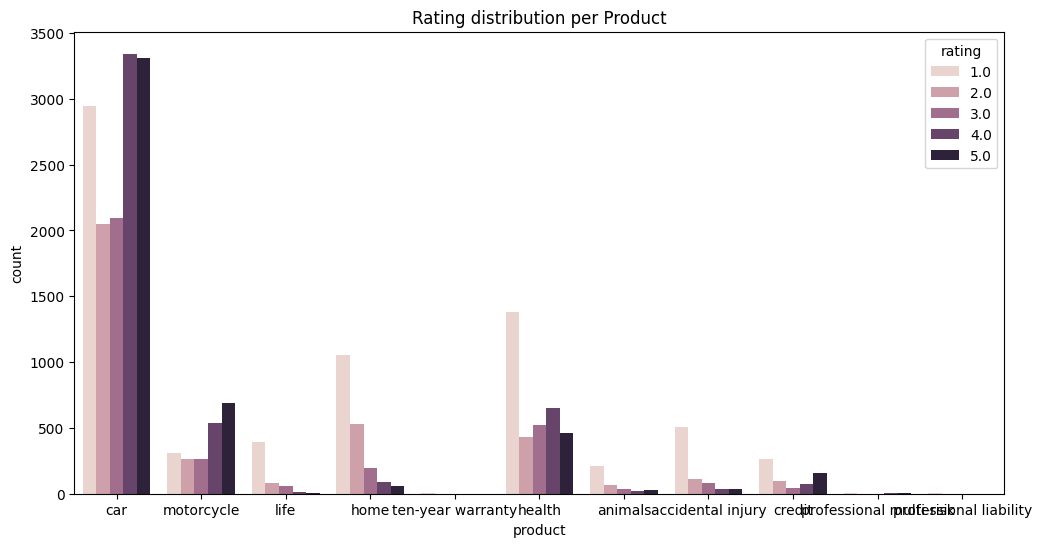

In [11]:
print("\nCount of products per rating:")
print(combined_df.groupby("product")["rating"].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x="product", hue="rating")
plt.title("Rating distribution per Product")
plt.show()

# Exploratory Data Analysis and Word Frequency

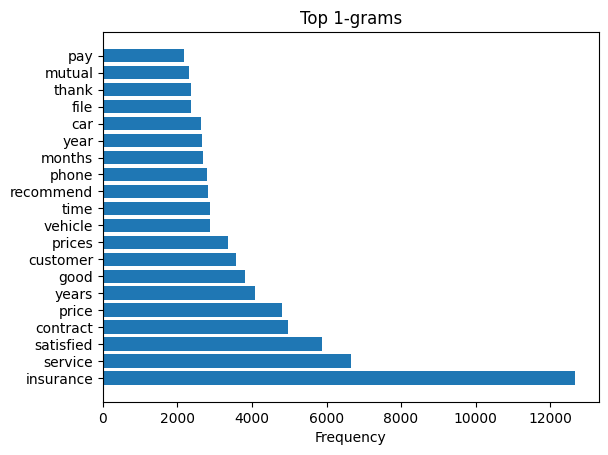

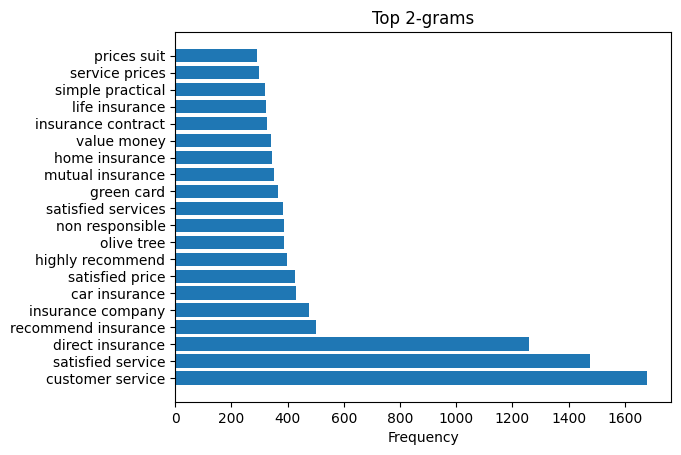

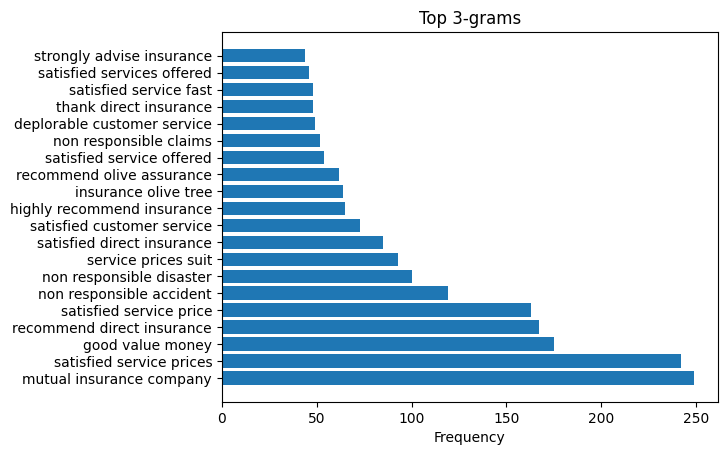

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate n-grams
def plot_ngrams(reviews, n=1, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_counts = vectorizer.fit_transform(reviews)
    ngram_freq = ngram_counts.sum(axis=0).A1
    ngram_words = vectorizer.get_feature_names_out()
    ngram_data = sorted(zip(ngram_freq, ngram_words), reverse=True)[:top_n]
    
    plt.barh([x[1] for x in ngram_data], [x[0] for x in ngram_data])
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Plot frequent words and bigrams
plot_ngrams(combined_df['review'], n=1)  # Unigrams
plot_ngrams(combined_df['review'], n=2)  # Bigrams
plot_ngrams(combined_df['review'], n=3)  # Trigrams

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(combined_df['review']))

# Data Preprocessing

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    """Cleans and preprocesses text data."""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatize words
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    # Stem words (optional, depending on need)
    # text = ' '.join(stemmer.stem(word) for word in text.split())
    return text

processed_df = combined_df.copy()

# Apply preprocessing to the review column
processed_df['review'] = combined_df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ringi_3xz04z7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ringi_3xz04z7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ringi_3xz04z7\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
# Check a sample of the preprocessed reviews
display(combined_df['review'].head())
display(processed_df['review'].head())

0    The person on the phone was clear and friendly...
1    Satisfied. Reactivity, simplicity. Attractive ...
2    Insurer to flee, does not ensure its responsib...
3    The GMF has been waiting for a water damage fo...
4    I am good with this insurance. She is practica...
Name: review, dtype: object

0    person phone clear friendly explained everythi...
1    satisfied reactivity simplicity attractive pri...
2    insurer flee ensure responsibility insurance a...
3    gmf waiting water damage 3 month several contr...
4    good insurance practical least find miurre ins...
Name: review, dtype: object

# Model testing

## Functions for efficiency

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
from mord import LogisticIT
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error



# Function for adaptive downsampling of overrepresented classes
def adaptive_downsampling(df, target_column, min_samples=500):
    class_counts = df[target_column].value_counts()
    median_count = class_counts.median()  # Use the median for balancing overrepresented classes
    downsampled_data = []

    for label, count in class_counts.items():
        if count > min_samples:
            # For classes above the threshold, sample up to the smaller of the median or the actual class size
            sample_size = min(int(max(median_count, min_samples)), count)
            downsampled_data.append(df[df[target_column] == label].sample(sample_size, random_state=42))
        else:
            # Retain underrepresented classes as-is
            downsampled_data.append(df[df[target_column] == label])

    return pd.concat(downsampled_data, ignore_index=True)

# Function for adaptive downsampling to a max value
def downsample_to_max(df, target_column, max_samples=1000, random_state=42):
    # Group the dataframe by the target column
    grouped = df.groupby(target_column)
    
    # Apply downsampling to each group
    downsampled_groups = [
        group.sample(n=min(len(group), max_samples), random_state=random_state)
        for _, group in grouped
    ]
    
    # Concatenate all the downsampled groups
    downsampled_df = pd.concat(downsampled_groups).reset_index(drop=True)
    
    return downsampled_df

# Data Preparation Methods
def data_prep_tfidf(df):
    """Prepares data using TF-IDF vectorization."""
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(df['review'])
    y = df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def data_prep_word2vec(df):
    """Prepares data using Word2Vec embeddings."""
    sentences = [review.split() for review in df['review']]
    w2v_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    # Convert each review into the mean of its word embeddings
    X = np.array([np.mean([w2v_model.wv[word] for word in sentence if word in w2v_model.wv] or [np.zeros(100)], axis=0) for sentence in sentences])
    y = df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def data_prep_sentence_bert(df):
    """Prepares data using Sentence BERT embeddings."""
    sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    X = sbert_model.encode(df['review'].tolist())
    y = df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def data_prep_hybrid(df):
    """Prepares data using a hybrid approach combining TF-IDF and Sentence-BERT."""
    # TF-IDF Features
    tfidf = TfidfVectorizer(max_features=5000)
    X_tfidf = tfidf.fit_transform(df['review']).toarray()

    # SBERT Features
    sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    X_sbert = sbert_model.encode(df['review'].tolist())

    # Combine Features
    X = np.hstack((X_tfidf, X_sbert))
    y = df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def data_prep_lstm(df, max_features=5000):
    """Prepares data for LSTM model training."""
    # TF-IDF Vectorization
    tfidf = TfidfVectorizer(max_features=max_features)
    X = tfidf.fit_transform(df['review'])
    feature_names = tfidf.get_feature_names_out()
    
    # Convert sparse matrix to dense
    X = X.toarray()
    
    # Encode target labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['rating'])
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test, feature_names, label_encoder

def data_prep_bert(df, model_name="bert-base-uncased", max_length=128, batch_size=32):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    label_encoder = LabelEncoder()
    
    # Tokenization
    inputs = tokenizer(df['review'].tolist(), max_length=max_length, truncation=True, padding="max_length", return_tensors="pt")
    
    # Encode and convert labels to LongTensor
    labels = torch.tensor(label_encoder.fit_transform(df['rating']), dtype=torch.long)
    
    # Create Dataset
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
    
    # Train-Test Split
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    
    # Data Loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    return train_loader, test_loader, label_encoder

# Model Training Functions
def train_lr_model(X_train, y_train):
    """Trains a Logistic Regression model."""
    print("Training Logistic Regression model...")
    model = LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial')
    model.fit(X_train, y_train)
    return model  

def train_rf_model(X_train, y_train):
    """Trains a Random Forest model."""
    print("Training Random Forest model...")
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    return model 

def train_ord_model(X_train, y_train):
    """Trains an Ordinal regression model."""
    print("Training Ordinal regression model...")
    y_train = y_train.astype(int)
    model = LogisticIT()
    model.fit(X_train, y_train)
    return model 


def build_and_train_lstm(X_train, y_train, max_features=5000, embed_dim=128, lstm_units=128, epochs=5, batch_size=32):
    # Define the LSTM model
    model = Sequential([
        Embedding(input_dim=max_features, output_dim=embed_dim, input_length=X_train.shape[1]),
        LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2),
        Dense(len(np.unique(y_train)), activation='softmax')  # Number of unique classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model
    model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stop])
    return model

from transformers import BertForSequenceClassification, AdamW
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.cuda import is_available

def build_and_train_bert(train_loader, num_classes, model_name="bert-base-uncased", epochs=4, learning_rate=5e-5):
    # Check for GPU
    device = torch.device("cuda" if is_available() else "cpu")
    print(f"Device: {device}")
    
    # Load Pretrained BERT with Classification Head
    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)
    model.to(device)
    
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    loss_fn = CrossEntropyLoss()
    
    # Training Loop
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        total_loss = 0
        for batch in train_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            
            loss.backward()
            optimizer.step()
        
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")
    
    return model

# Model Evaluation
def evaluate_model(model, X_test, y_test, target_labels):
    """Evaluates a model with classification report, confusion matrix, MAE, and MSE."""
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Convert target_labels to strings
    target_labels = [str(label) for label in target_labels]

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_labels))
    
        # Calculate and display MAE and MSE
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    

    
def evaluate_lstm_model(model, X_test, y_test, label_encoder):
    # Predictions
    y_pred = model.predict(X_test).argmax(axis=1)
    y_test_decoded = label_encoder.inverse_transform(y_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_bert_model(model, test_loader, label_encoder):
    """
    Evaluates a BERT model using test data.

    Parameters:
        model (BertForSequenceClassification): Trained BERT model.
        test_loader (DataLoader): Data loader for test data.
        label_encoder (LabelEncoder): Fitted label encoder for decoding predictions.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    # Decode labels
    y_true_decoded = label_encoder.inverse_transform(y_true)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Ensure target names are strings
    target_names = [str(label) for label in label_encoder.classes_]

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true_decoded, y_pred_decoded, target_names=target_names))

    # Compute MAE and MSE
    mae = mean_absolute_error(y_true_decoded, y_pred_decoded)
    mse = mean_squared_error(y_true_decoded, y_pred_decoded)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true_decoded, y_pred_decoded, labels=label_encoder.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    

## Testing vectorization techniques on LR and RF with preprocessed data

### TFIDF

Training Logistic Regression model...


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest model...
Training Ordinal regression model...
Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.60      0.85      0.71      1419
         2.0       0.32      0.16      0.21       727
         3.0       0.30      0.15      0.20       659
         4.0       0.41      0.41      0.41       954
         5.0       0.53      0.59      0.55       949

    accuracy                           0.50      4708
   macro avg       0.43      0.43      0.42      4708
weighted avg       0.46      0.50      0.47      4708

Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 1.07
Confusion Matrix:


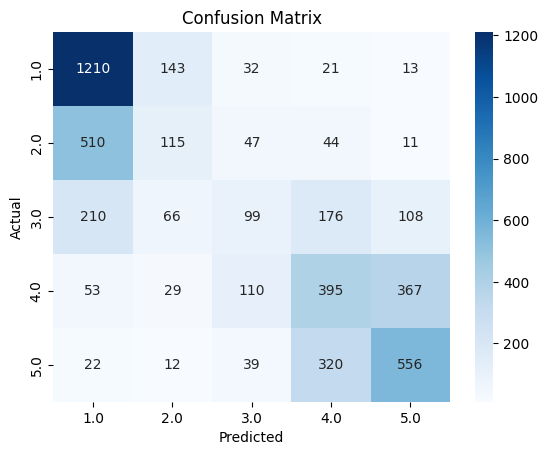

Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.54      0.95      0.69      1419
         2.0       0.30      0.01      0.02       727
         3.0       0.39      0.05      0.08       659
         4.0       0.40      0.43      0.42       954
         5.0       0.50      0.57      0.53       949

    accuracy                           0.50      4708
   macro avg       0.43      0.40      0.35      4708
weighted avg       0.45      0.50      0.41      4708

Mean Absolute Error (MAE): 0.75
Mean Squared Error (MSE): 1.43
Confusion Matrix:


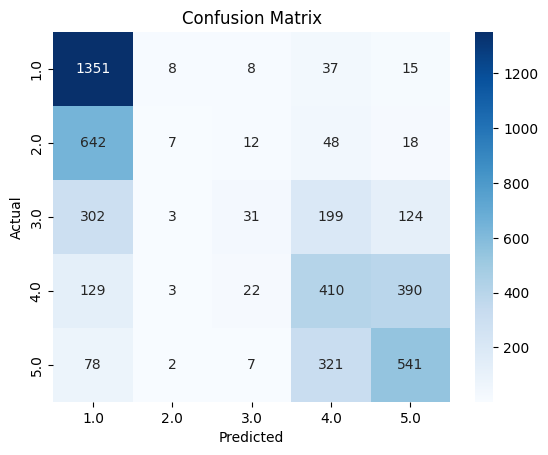

Ordinal Regression Model:
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.90      0.72      1419
           2       0.23      0.03      0.05       727
           3       0.26      0.15      0.19       659
           4       0.40      0.45      0.42       954
           5       0.53      0.58      0.55       949

    accuracy                           0.50      4708
   macro avg       0.40      0.42      0.39      4708
weighted avg       0.44      0.50      0.45      4708

Mean Absolute Error (MAE): 0.65
Mean Squared Error (MSE): 1.00
Confusion Matrix:


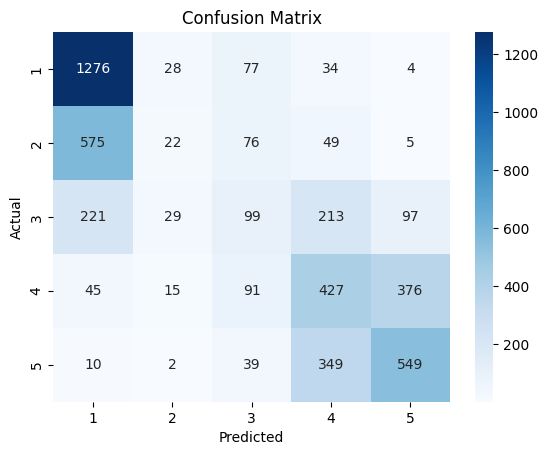

In [66]:
# Prepare data
X_train, X_test, y_train, y_test = data_prep_tfidf(processed_df)

# Train Logistic Regression model
lr_rating = train_lr_model(X_train, y_train)

# Train Random Forest model
rf_rating = train_rf_model(X_train, y_train)

# Train Ordinal regression model
ord_rating = train_ord_model(X_train, y_train)

# Evaluate Logistic Regression model
print("Logistic Regression Model:")
evaluate_model(lr_rating, X_test, y_test, lr_rating.classes_)

# Evaluate Random Forest model
print("Random Forest Model:")
evaluate_model(rf_rating, X_test, y_test, rf_rating.classes_)

# Evaluate Ordinal regression model
print("Ordinal Regression Model:")
evaluate_model(ord_rating, X_test, y_test, ord_rating.classes_)

In [70]:
import pickle

# Save the logistic regression model
with open("rating_models/lr_model_tfidf_processed_df.pkl", "wb") as file:
    pickle.dump(lr_rating, file)

# Save the random forest model
with open("rating_models/rf_model_tfidf_processed_df.pkl", "wb") as file:
    pickle.dump(rf_rating, file)

# Save the ordinal logistic regression model
with open("rating_models/ord_model_tfidf_processed_df.pkl", "wb") as file:
    pickle.dump(ord_rating, file)

print("Models saved successfully!")



Models saved successfully!


### W2V

Training Logistic Regression model...


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest model...
Training Ordinal regression model...
Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.57      0.93      0.71      1419
         2.0       0.26      0.05      0.08       727
         3.0       0.32      0.16      0.21       659
         4.0       0.42      0.41      0.42       954
         5.0       0.52      0.56      0.54       949

    accuracy                           0.51      4708
   macro avg       0.42      0.42      0.39      4708
weighted avg       0.45      0.51      0.45      4708

Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 1.21
Confusion Matrix:


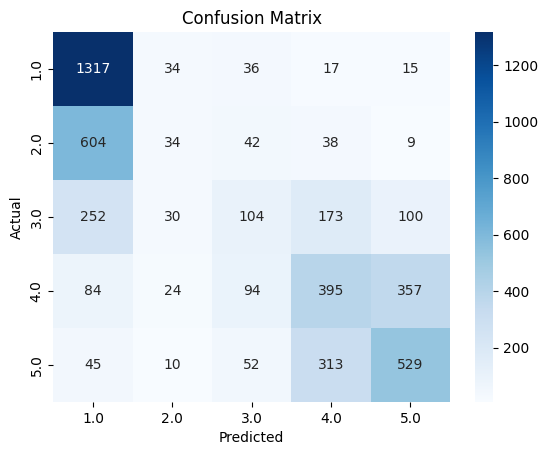

Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.57      0.90      0.70      1419
         2.0       0.36      0.10      0.16       727
         3.0       0.36      0.11      0.16       659
         4.0       0.40      0.44      0.42       954
         5.0       0.50      0.53      0.51       949

    accuracy                           0.50      4708
   macro avg       0.44      0.42      0.39      4708
weighted avg       0.46      0.50      0.45      4708

Mean Absolute Error (MAE): 0.70
Mean Squared Error (MSE): 1.24
Confusion Matrix:


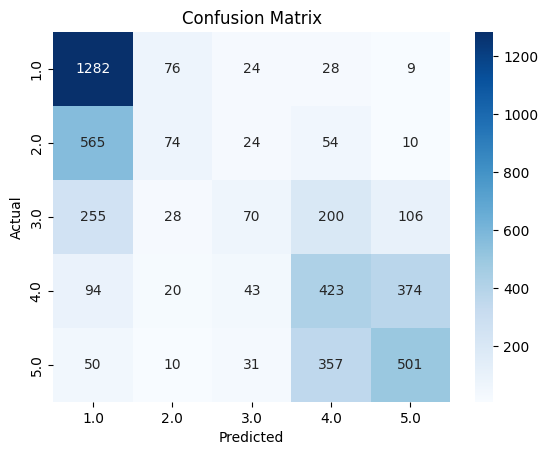

Ordinal Regression Model:
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.95      0.70      1419
           2       0.00      0.00      0.00       727
           3       0.25      0.06      0.10       659
           4       0.37      0.38      0.38       954
           5       0.49      0.56      0.52       949

    accuracy                           0.49      4708
   macro avg       0.33      0.39      0.34      4708
weighted avg       0.37      0.49      0.41      4708

Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 1.32
Confusion Matrix:


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

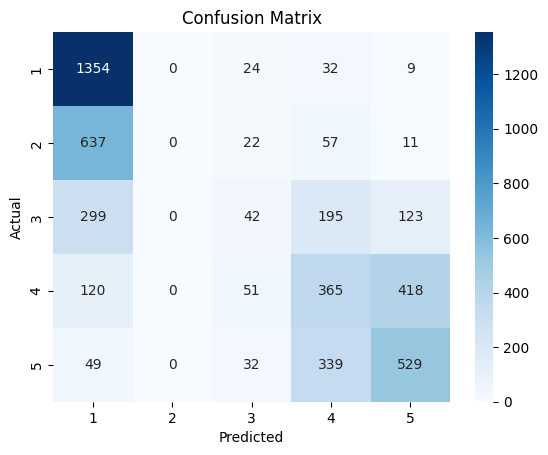

In [73]:
# Prepare data
X_train, X_test, y_train, y_test = data_prep_word2vec(processed_df)

# Train Logistic Regression model
lr_rating = train_lr_model(X_train, y_train)

# Train Random Forest model
rf_rating = train_rf_model(X_train, y_train)

# Train Ordinal regression model
ord_rating = train_ord_model(X_train, y_train)

# Evaluate Logistic Regression model
print("Logistic Regression Model:")
evaluate_model(lr_rating, X_test, y_test, lr_rating.classes_)

# Evaluate Random Forest model
print("Random Forest Model:")
evaluate_model(rf_rating, X_test, y_test, rf_rating.classes_)

# Evaluate Ordinal regression model
print("Ordinal Regression Model:")
evaluate_model(ord_rating, X_test, y_test, ord_rating.classes_)

In [74]:
import pickle

# Save the logistic regression model
with open("rating_models/lr_model_w2v_processed_df.pkl", "wb") as file:
    pickle.dump(lr_rating, file)

# Save the random forest model
with open("rating_models/rf_model_w2v_processed_df.pkl", "wb") as file:
    pickle.dump(rf_rating, file)

# Save the ordinal logistic regression model
with open("rating_models/ord_model_w2v_processed_df.pkl", "wb") as file:
    pickle.dump(ord_rating, file)

print("Models saved successfully!")



Models saved successfully!


### S-BERT

Training Logistic Regression model...


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest model...
Training Ordinal regression model...
Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.59      0.84      0.69      1419
         2.0       0.35      0.15      0.21       727
         3.0       0.28      0.16      0.21       659
         4.0       0.41      0.42      0.42       954
         5.0       0.53      0.56      0.54       949

    accuracy                           0.50      4708
   macro avg       0.43      0.43      0.41      4708
weighted avg       0.46      0.50      0.46      4708

Mean Absolute Error (MAE): 0.70
Mean Squared Error (MSE): 1.21
Confusion Matrix:


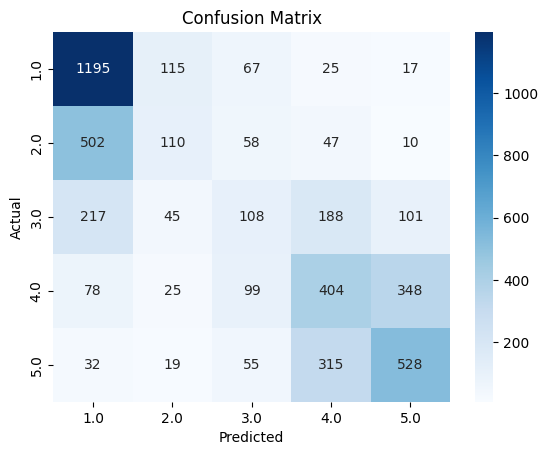

Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.53      0.92      0.68      1419
         2.0       0.30      0.04      0.07       727
         3.0       0.33      0.04      0.07       659
         4.0       0.39      0.40      0.40       954
         5.0       0.48      0.56      0.52       949

    accuracy                           0.48      4708
   macro avg       0.40      0.39      0.35      4708
weighted avg       0.43      0.48      0.41      4708

Mean Absolute Error (MAE): 0.80
Mean Squared Error (MSE): 1.61
Confusion Matrix:


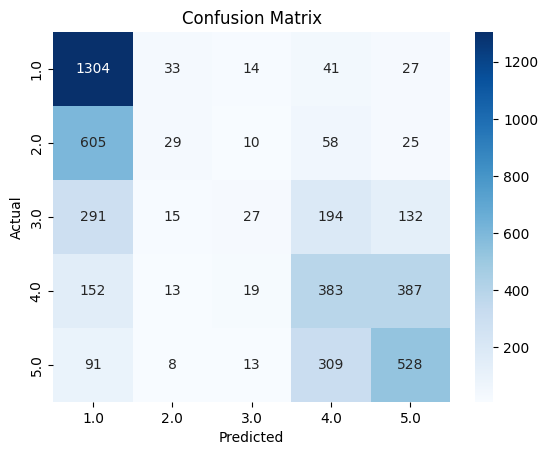

Ordinal Regression Model:
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.91      0.70      1419
           2       0.00      0.00      0.00       727
           3       0.28      0.13      0.18       659
           4       0.37      0.39      0.38       954
           5       0.50      0.59      0.54       949

    accuracy                           0.49      4708
   macro avg       0.34      0.41      0.36      4708
weighted avg       0.39      0.49      0.42      4708

Mean Absolute Error (MAE): 0.71
Mean Squared Error (MSE): 1.24
Confusion Matrix:


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

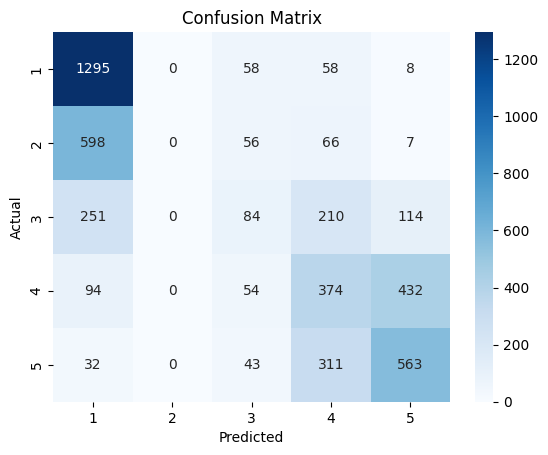

In [75]:
# Prepare data
X_train, X_test, y_train, y_test = data_prep_sentence_bert(processed_df)

# Train Logistic Regression model
lr_rating = train_lr_model(X_train, y_train)

# Train Random Forest model
rf_rating = train_rf_model(X_train, y_train)

# Train Ordinal regression model
ord_rating = train_ord_model(X_train, y_train)

# Evaluate Logistic Regression model
print("Logistic Regression Model:")
evaluate_model(lr_rating, X_test, y_test, lr_rating.classes_)

# Evaluate Random Forest model
print("Random Forest Model:")
evaluate_model(rf_rating, X_test, y_test, rf_rating.classes_)

# Evaluate Ordinal regression model
print("Ordinal Regression Model:")
evaluate_model(ord_rating, X_test, y_test, ord_rating.classes_)

In [76]:
import pickle

# Save the logistic regression model
with open("rating_models/lr_model_sbert_processed_df.pkl", "wb") as file:
    pickle.dump(lr_rating, file)

# Save the random forest model
with open("rating_models/rf_model_sbert_processed_df.pkl", "wb") as file:
    pickle.dump(rf_rating, file)

# Save the ordinal logistic regression model
with open("rating_models/ord_model_sbert_processed_df.pkl", "wb") as file:
    pickle.dump(ord_rating, file)

print("Models saved successfully!")



Models saved successfully!


## Testing vectorization techniques on diverse models (LR, RF, LSTM, BERT) on downsampled preprocessed data

### Downsampling

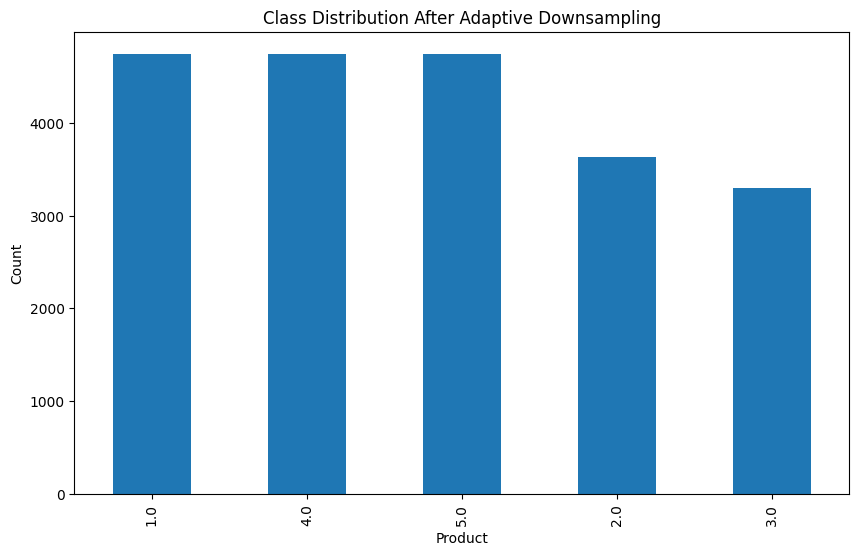

In [27]:
# Example usage
downsampled_df = adaptive_downsampling(processed_df, target_column='rating', min_samples=500)

# Visualize the new class distribution
plt.figure(figsize=(10, 6))
downsampled_df['rating'].value_counts().plot(kind='bar')
plt.title("Class Distribution After Adaptive Downsampling")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

### TFIDF on LR and RF

Training Logistic Regression model...


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest model...
Training Ordinal regression model...
Classification Report:
              precision    recall  f1-score   support

         1.0       0.55      0.72      0.62       949
         2.0       0.39      0.33      0.36       727
         3.0       0.33      0.19      0.24       659
         4.0       0.43      0.44      0.44       949
         5.0       0.53      0.58      0.55       949

    accuracy                           0.48      4233
   macro avg       0.45      0.45      0.44      4233
weighted avg       0.46      0.48      0.46      4233

Mean Absolute Error (MAE): 0.67
Mean Squared Error (MSE): 1.02
Confusion Matrix:


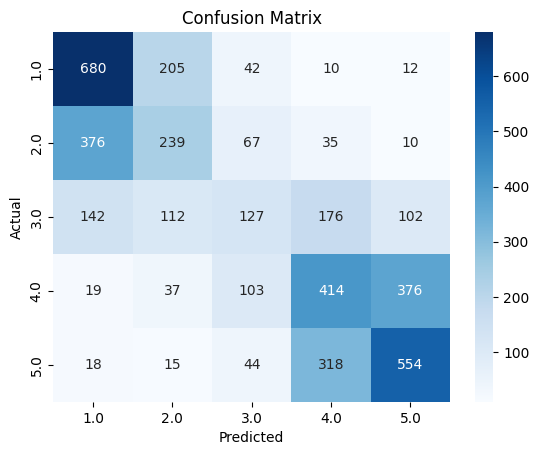

Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.88      0.62       949
         2.0       0.39      0.10      0.16       727
         3.0       0.38      0.07      0.12       659
         4.0       0.43      0.46      0.45       949
         5.0       0.50      0.60      0.55       949

    accuracy                           0.46      4233
   macro avg       0.44      0.42      0.38      4233
weighted avg       0.44      0.46      0.41      4233

Mean Absolute Error (MAE): 0.76
Mean Squared Error (MSE): 1.36
Confusion Matrix:


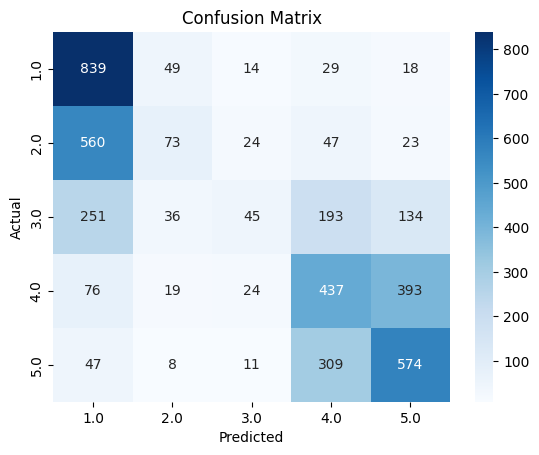

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.70      0.62       949
           2       0.37      0.29      0.32       727
           3       0.29      0.17      0.21       659
           4       0.43      0.47      0.45       949
           5       0.54      0.59      0.56       949

    accuracy                           0.47      4233
   macro avg       0.44      0.44      0.43      4233
weighted avg       0.45      0.47      0.46      4233

Mean Absolute Error (MAE): 0.65
Mean Squared Error (MSE): 0.94
Confusion Matrix:


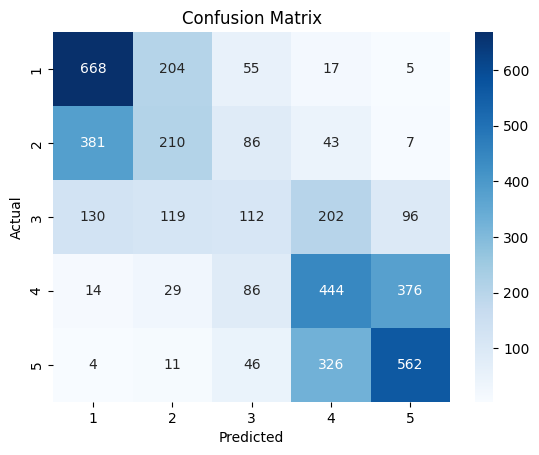

In [28]:
# TF-IDF Data Preparation
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = data_prep_tfidf(downsampled_df)

# Train Logistic Regression on TF-IDF features
lr_tfidf = train_lr_model(X_train_tfidf, y_train_tfidf)

# Train Random Forest on TF-IDF features
rf_tfidf = train_rf_model(X_train_tfidf, y_train_tfidf)

# Train Random Forest on TF-IDF features
ord_tfidf = train_ord_model(X_train_tfidf, y_train_tfidf)

# Evaluate Logistic Regression (TF-IDF)
evaluate_model(lr_tfidf, X_test_tfidf, y_test_tfidf, lr_tfidf.classes_)

# Evaluate Random Forest (TF-IDF)
evaluate_model(rf_tfidf, X_test_tfidf, y_test_tfidf, rf_tfidf.classes_)

# Evaluate Random Forest (TF-IDF)
evaluate_model(ord_tfidf, X_test_tfidf, y_test_tfidf, ord_tfidf.classes_)

In [30]:
import pickle

# Save the logistic regression model
with open("rating_models/lr_model_tfidf_downsampled_df.pkl", "wb") as file:
    pickle.dump(lr_tfidf, file)

# Save the random forest model
with open("rating_models/rf_model_tfidf_downsampled_df.pkl", "wb") as file:
    pickle.dump(rf_tfidf, file)

# Save the ordinal logistic regression model
with open("rating_models/ord_model_tfidf_downsampled_df.pkl", "wb") as file:
    pickle.dump(ord_tfidf, file)

print("Models saved successfully!")



Models saved successfully!


### Hybrid (TFIDF + SBERT) on LR and RF

Training Logistic Regression model...


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest model...
Classification Report:
                         precision    recall  f1-score   support

                    car       0.49      0.51      0.50       128
                 health       0.72      0.68      0.70        73
             motorcycle       0.55      0.49      0.52       128
                   home       0.65      0.59      0.62       128
      accidental injury       0.61      0.73      0.66       128
                 credit       0.66      0.66      0.66       128
                   life       0.68      0.72      0.70       112
                animals       0.59      0.56      0.57       128
professional multi-risk       0.00      0.00      0.00         1
      ten-year warranty       0.00      0.00      0.00         4
 professional liability       0.00      0.00      0.00         2

               accuracy                           0.61       960
              macro avg       0.45      0.45      0.45       960
           weighted avg       0.6

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

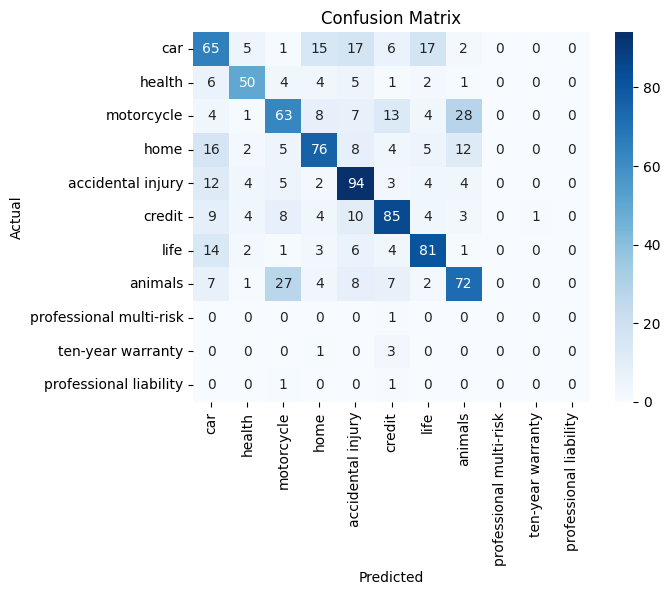

Classification Report:
                         precision    recall  f1-score   support

                    car       0.45      0.48      0.47       128
                 health       0.89      0.53      0.67        73
             motorcycle       0.50      0.45      0.48       128
                   home       0.48      0.47      0.48       128
      accidental injury       0.54      0.70      0.61       128
                 credit       0.62      0.66      0.64       128
                   life       0.65      0.62      0.63       112
                animals       0.56      0.58      0.57       128
professional multi-risk       0.00      0.00      0.00         1
      ten-year warranty       0.00      0.00      0.00         4
 professional liability       0.00      0.00      0.00         2

               accuracy                           0.56       960
              macro avg       0.43      0.41      0.41       960
           weighted avg       0.56      0.56      0.56       960


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

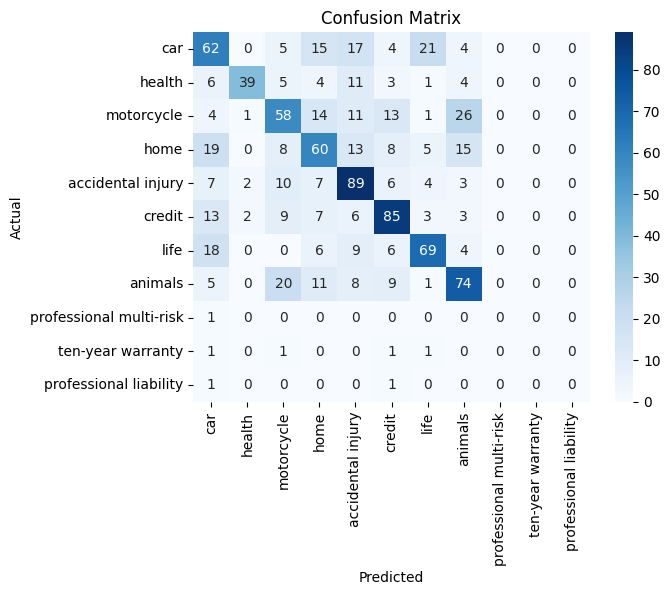

In [167]:
# Hybrid Data Preparation (TF-IDF + Sentence-BERT)
X_train_hybrid, X_test_hybrid, y_train_hybrid, y_test_hybrid = data_prep_hybrid(downsampled_df)

# Train Logistic Regression on Hybrid features
lr_hybrid = train_lr_model(X_train_hybrid, y_train_hybrid)

# Train Random Forest on Hybrid features
rf_hybrid = train_rf_model(X_train_hybrid, y_train_hybrid)

# Evaluate Logistic Regression (Hybrid)
evaluate_model(lr_hybrid, X_test_hybrid, y_test_hybrid, target_labels=downsampled_df['product'].unique())

# Evaluate Random Forest (Hybrid)
evaluate_model(rf_hybrid, X_test_hybrid, y_test_hybrid, target_labels=downsampled_df['product'].unique())

### LSTM on preprocessed data

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 2746s 6s/step - accuracy: 0.5834 - loss: 1.4547 - val_accuracy: 0.5707 - val_loss: 1.4130
Epoch 2/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 2651s 6s/step - accuracy: 0.5810 - loss: 1.4025 - val_accuracy: 0.5707 - val_loss: 1.4108
Epoch 3/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 2596s 6s/step - accuracy: 0.5888 - loss: 1.3858 - val_accuracy: 0.5707 - val_loss: 1.4072
Epoch 4/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 2611s 6s/step - accuracy: 0.5912 - loss: 1.3752 - val_accuracy: 0.5707 - val_loss: 1.4088
Epoch 5/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 2629s 6s/step - accuracy: 0.5898 - loss: 1.3803 - val_accuracy: 0.5707 - val_loss: 1.4084
148/148 ━━━━━━━━━━━━━━━━━━━━ 141s 953ms/step
Classification Report:
                         precision    recall  f1-score   support

      accidental injury       0.00      0.00      0.00       153
                animals       0.00      0.00      0.00        73
                    car       0.58      1.00      0.74      2749
                 credit   

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

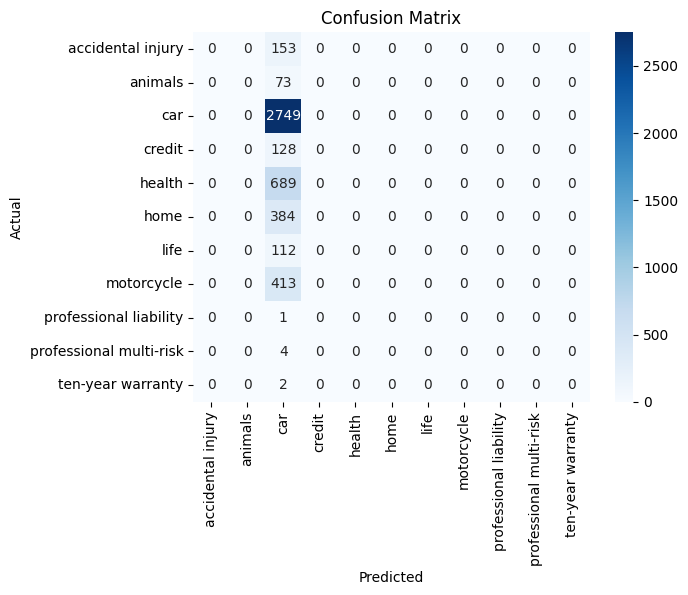

In [116]:
# Data Preparation
X_train, X_test, y_train, y_test, feature_names, label_encoder = data_prep_lstm(processed_df)

# Build and Train LSTM Model
lstm_model_processed = build_and_train_lstm(X_train, y_train)

# Evaluate LSTM Model
evaluate_lstm_model(lstm_model_processed, X_test, y_test, label_encoder)

# Save the model
lstm_model_processed.save("lstm_model_processed_df.keras")

### LSTM on downsampled preprocessed data

Epoch 1/5


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 530s 5s/step - accuracy: 0.1272 - loss: 2.1956 - val_accuracy: 0.1263 - val_loss: 2.0906
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 552s 6s/step - accuracy: 0.1176 - loss: 2.1247 - val_accuracy: 0.1211 - val_loss: 2.1059
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 552s 6s/step - accuracy: 0.1315 - loss: 2.1182 - val_accuracy: 0.1263 - val_loss: 2.0883
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 553s 6s/step - accuracy: 0.1375 - loss: 2.1180 - val_accuracy: 0.1328 - val_loss: 2.0944
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 551s 6s/step - accuracy: 0.1354 - loss: 2.1143 - val_accuracy: 0.1341 - val_loss: 2.1082
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 944ms/step
Classification Report:
                         precision    recall  f1-score   support

      accidental injury       0.00      0.00      0.00       128
                animals       0.00      0.00      0.00        73
                    car       0.00      0.00      0.00       128
                 credit       0.00      0.00      0.00

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

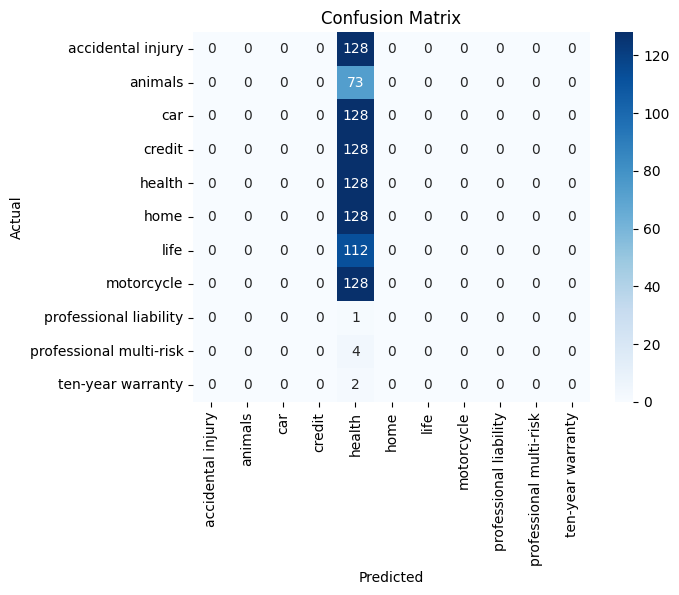

In [117]:
# Data Preparation
X_train, X_test, y_train, y_test, feature_names, label_encoder = data_prep_lstm(downsampled_df)

# Build and Train LSTM Model
lstm_model_downsampled = build_and_train_lstm(X_train, y_train)

# Evaluate LSTM Model
evaluate_lstm_model(lstm_model_downsampled, X_test, y_test, label_encoder)

# Save the model
lstm_model_downsampled.save("lstm_model_downsampled_df.keras")

### BERT on preprocessed data

Device: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
Epoch 1 Loss: 0.8346
Epoch 2/4
Epoch 2 Loss: 0.5541
Epoch 3/4
Epoch 3 Loss: 0.4395
Epoch 4/4
Epoch 4 Loss: 0.3240
Classification Report:


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                         precision    recall  f1-score   support

      accidental injury       0.74      0.53      0.62       167
                animals       0.85      0.52      0.65        63
                    car       0.80      0.96      0.87      2729
                 credit       0.60      0.57      0.58       122
                 health       0.88      0.76      0.82       692
                   home       0.81      0.45      0.58       401
                   life       0.85      0.61      0.71       109
             motorcycle       0.77      0.45      0.57       415
 professional liability       0.00      0.00      0.00         1
professional multi-risk       0.00      0.00      0.00         8
      ten-year warranty       0.00      0.00      0.00         1

               accuracy                           0.80      4708
              macro avg       0.57      0.44      0.49      4708
           weighted avg       0.80      0.80      0.79      4708



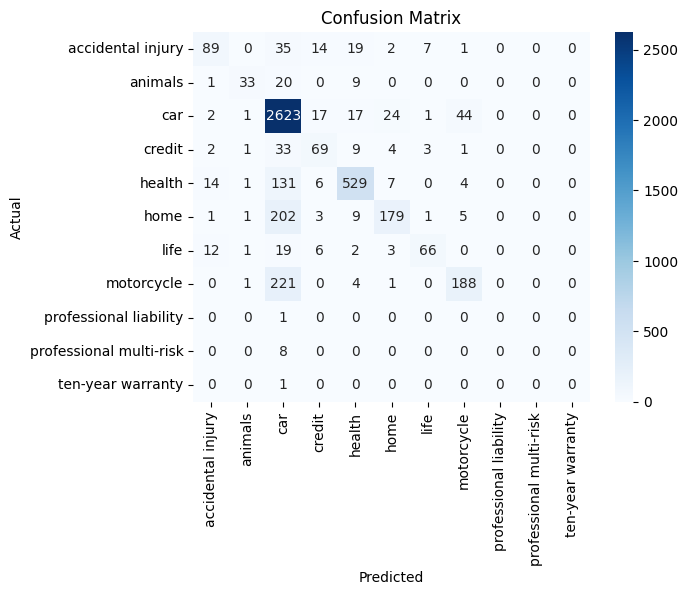

In [ ]:
# Data Preparation
train_loader, test_loader, label_encoder = data_prep_bert(processed_df)

# Build and Train BERT Model
bert_model_processed = build_and_train_bert(train_loader, num_classes=len(label_encoder.classes_))

# Evaluate BERT Model
evaluate_bert_model(bert_model_processed, test_loader, label_encoder)

### BERT on downsampled preprocessed data

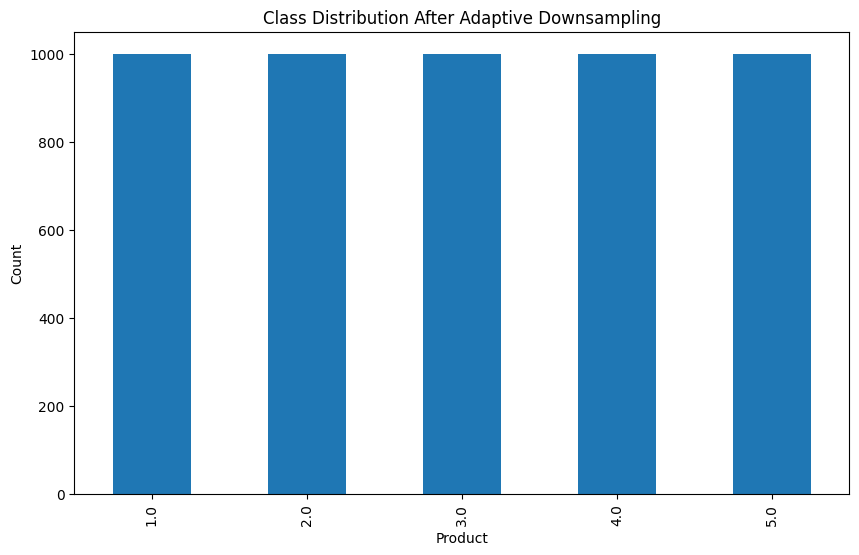

In [6]:
# Example usage
downsampled_1k_df = downsample_to_max(processed_df, target_column='rating', max_samples=1000)

# Visualize the new class distribution
plt.figure(figsize=(10, 6))
downsampled_1k_df['rating'].value_counts().plot(kind='bar')
plt.title("Class Distribution After Adaptive Downsampling")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

In [83]:
# Data Preparation
train_loader, test_loader, label_encoder = data_prep_bert(downsampled_1k_df)

# Build and Train BERT Model
bert_model_downsampled = build_and_train_bert(train_loader, num_classes=len(label_encoder.classes_))



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ringi_3xz04z7\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Device: cpu


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
Epoch 1 Loss: 1.3266
Epoch 2/4
Epoch 2 Loss: 1.1349
Epoch 3/4
Epoch 3 Loss: 1.0103
Epoch 4/4
Epoch 4 Loss: 0.8432


Classification Report:
              precision    recall  f1-score   support

         1.0       0.52      0.23      0.32       205
         2.0       0.38      0.72      0.49       208
         3.0       0.43      0.17      0.25       218
         4.0       0.31      0.14      0.20       180
         5.0       0.43      0.76      0.55       189

    accuracy                           0.40      1000
   macro avg       0.41      0.41      0.36      1000
weighted avg       0.41      0.40      0.36      1000

Mean Absolute Error (MAE): 0.7370
Mean Squared Error (MSE): 1.0650


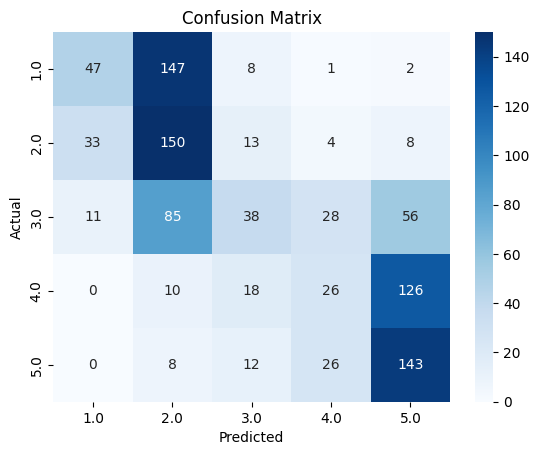

In [86]:
# Evaluate BERT Model
evaluate_bert_model(bert_model_downsampled, test_loader, label_encoder)

In [95]:
import joblib
joblib.dump(bert_model_downsampled, "rating_models/bert_model_downsampled_df.pkl")


['rating_models/bert_model_downsampled_df.pkl']

# Comparative Evaluation of best models

## Using Macro F1-Score

In [1]:
# Models to load and evaluate and compare are in the rating_models folder
# their names are : lr_model_tfidf_processed_df.pkl, lr_model_sbert_processed_df.pkl, lr_model_tfidf_downsampled_df.pkl, lr_model_sbert_downsampled_df.pkl, lr_model_hybrid_downsampled_df.pkl
# and rf_model_tfidf_processed_df.pkl, rf_model_tfidf_downsampled_df.pkl
# and lstm_model_processed_df.keras, lstm_model_downsampled_df.keras
# and bert_model_processed_df, bert_model_downsampled_df

# Load the models
import joblib
from keras.models import load_model
import torch

# Load the models
lr_tfidf_processed = joblib.load(open("rating_models/lr_model_tfidf_processed_df.pkl", "rb"))
lr_w2v_processed = joblib.load(open("rating_models/lr_model_w2v_processed_df.pkl", "rb"))
lr_sbert_processed = joblib.load(open("rating_models/lr_model_sbert_processed_df.pkl", "rb"))
lr_tfidf_downsampled = joblib.load(open("rating_models/lr_model_tfidf_downsampled_df.pkl", "rb"))
#rf_sbert_downsampled = joblib.load(open("rating_models/lr_model_sbert_downsampled_df.pkl", "rb"))
#rf_hybrid_downsampled = joblib.load(open("rating_models/lr_model_hybrid_downsampled_df.pkl", "rb"))

rf_tfidf_processed = joblib.load(open("rating_models/rf_model_tfidf_processed_df.pkl", "rb"))
rf_w2v_processed = joblib.load(open("rating_models/rf_model_w2v_processed_df.pkl", "rb"))
rf_sbert_processed = joblib.load(open("rating_models/rf_model_sbert_processed_df.pkl", "rb"))
rf_tfidf_downsampled = joblib.load(open("rating_models/rf_model_tfidf_downsampled_df.pkl", "rb"))
#rf_sbert_downsampled = joblib.load(open("rating_models/lr_model_sbert_downsampled_df.pkl", "rb"))
#rf_hybrid_downsampled = joblib.load(open("rating_models/lr_model_hybrid_downsampled_df.pkl", "rb"))

ord_tfidf_processed = joblib.load(open("rating_models/ord_model_tfidf_processed_df.pkl", "rb"))
ord_w2v_processed = joblib.load(open("rating_models/ord_model_w2v_processed_df.pkl", "rb"))
ord_sbert_processed = joblib.load(open("rating_models/ord_model_sbert_processed_df.pkl", "rb"))
ord_tfidf_downsampled = joblib.load(open("rating_models/ord_model_tfidf_downsampled_df.pkl", "rb"))
#rf_sbert_downsampled = joblib.load(open("rating_models/ord_model_sbert_downsampled_df.pkl", "rb"))
#rf_hybrid_downsampled = joblib.load(open("rating_models/ord_model_hybrid_downsampled_df.pkl", "rb"))


#lstm_processed = load_model("rating_models/lstm_model_processed_df.keras")
#lstm_downsampled = load_model("rating_models/lstm_model_downsampled_df.keras")

#bert_processed = BertForSequenceClassification.from_pretrained("rating_models/bert_model_processed_df")
bert_downsampled = joblib.load("rating_models/bert_model_downsampled_df.pkl")

In [7]:
import pandas as pd

# Preparing data for each model
combined_df = pd.read_csv("combined_reviews.csv")
processed_df = combined_df.copy()
processed_df['review'] = combined_df['review'].apply(preprocess_text)
downsampled_df = adaptive_downsampling(processed_df, target_column='rating', min_samples=500)

# TF-IDF Data Preparation
X_train_tfidf_processed, X_test_tfidf_processed, y_train_tfidf_processed, y_test_tfidf_processed = data_prep_tfidf(processed_df)
X_train_tfidf_downsampled, X_test_tfidf_downsampled, y_train_tfidf_downsampled, y_test_tfidf_downsampled = data_prep_tfidf(downsampled_df)

# Word2Vec Data Preparation
X_train_w2v_processed, X_test_w2v_processed, y_train_w2v_processed, y_test_w2v_processed = data_prep_word2vec(processed_df)

# Sentence-BERT Data Preparation
X_train_sbert_processed, X_test_sbert_processed, y_train_sbert_processed, y_test_sbert_processed = data_prep_sentence_bert(processed_df)
#X_train_sbert_downsampled, X_test_sbert_downsampled, y_train_sbert_downsampled, y_test_sbert_downsampled = data_prep_sentence_bert(downsampled_df)

# # Hybrid Data Preparation
# X_train_hybrid_downsampled, X_test_hybrid_downsampled, y_train_hybrid_downsampled, y_test_hybrid_downsampled = data_prep_hybrid(downsampled_df)

# # LSTM Data Preparation
# X_train_lstm_processed, X_test_lstm_processed, y_train_lstm_processed, y_test_lstm_processed, _, _ = data_prep_lstm(processed_df)
# X_train_lstm_downsampled, X_test_lstm_downsampled, y_train_lstm_downsampled, y_test_lstm_downsampled, _, _ = data_prep_lstm(downsampled_df)

# BERT Data Preparation
# train_loader_bert_processed, test_loader_bert_processed, _ = data_prep_bert(processed_df)
train_loader_bert_downsampled, test_loader_bert_downsampled, _ = data_prep_bert(downsampled_1k_df)


In [8]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Function to evaluate traditional ML models with MAE
def evaluate_traditional_model_mae(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

# Function to evaluate deep learning models (LSTM and BERT) with MAE
def evaluate_deep_model_mae(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
    return mean_absolute_error(y_test, y_pred_classes)

# Function to evaluate BERT models using data loaders with MAE
def evaluate_bert_model_mae(bert_model, test_loader):
    bert_model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to("cpu") for x in batch]
            outputs = bert_model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return mean_absolute_error(all_labels, all_preds)

# Initialize results dictionary for MAE
results_mae = {}

# Evaluate Logistic Regression Models with MAE
results_mae["LR-TFIDF (Processed)"] = evaluate_traditional_model_mae(lr_tfidf_processed, X_test_tfidf_processed, y_test_tfidf_processed)
results_mae["LR-W2V (Processed)"] = evaluate_traditional_model_mae(lr_w2v_processed, X_test_w2v_processed, y_test_w2v_processed)
results_mae["LR-SBERT (Processed)"] = evaluate_traditional_model_mae(lr_sbert_processed, X_test_sbert_processed, y_test_sbert_processed)
results_mae["LR-TFIDF (Downsampled)"] = evaluate_traditional_model_mae(lr_tfidf_downsampled, X_test_tfidf_downsampled, y_test_tfidf_downsampled)
#results_mae["LR-SBERT (Downsampled)"] = evaluate_traditional_model_mae(lr_sbert_downsampled, X_test_sbert_downsampled, y_test_sbert_downsampled)
#results_mae["LR-Hybrid (Downsampled)"] = evaluate_traditional_model_mae(lr_hybrid_downsampled, X_test_hybrid_downsampled, y_test_hybrid_downsampled)

# Evaluate Random Forest Models with MAE
results_mae["RF-TFIDF (Processed)"] = evaluate_traditional_model_mae(rf_tfidf_processed, X_test_tfidf_processed, y_test_tfidf_processed)
results_mae["RF-W2V (Processed)"] = evaluate_traditional_model_mae(rf_w2v_processed, X_test_w2v_processed, y_test_w2v_processed)
results_mae["RF-SBERT (Processed)"] = evaluate_traditional_model_mae(rf_sbert_processed, X_test_sbert_processed, y_test_sbert_processed)
results_mae["RF-TFIDF (Downsampled)"] = evaluate_traditional_model_mae(rf_tfidf_downsampled, X_test_tfidf_downsampled, y_test_tfidf_downsampled)

# Evaluate Random Forest Models with MAE
results_mae["ORD-TFIDF (Processed)"] = evaluate_traditional_model_mae(ord_tfidf_processed, X_test_tfidf_processed, y_test_tfidf_processed)
results_mae["ORD-W2V (Processed)"] = evaluate_traditional_model_mae(ord_w2v_processed, X_test_w2v_processed, y_test_w2v_processed)
results_mae["ORD-SBERT (Processed)"] = evaluate_traditional_model_mae(ord_sbert_processed, X_test_sbert_processed, y_test_sbert_processed)
results_mae["ORD-TFIDF (Downsampled)"] = evaluate_traditional_model_mae(ord_tfidf_downsampled, X_test_tfidf_downsampled, y_test_tfidf_downsampled)

# Evaluate LSTM Models with MAE
#results_mae["LSTM (Processed)"] = evaluate_deep_model_mae(lstm_processed, X_test_lstm_processed, y_test_lstm_processed)
#results_mae["LSTM (Downsampled)"] = evaluate_deep_model_mae(lstm_downsampled, X_test_lstm_downsampled, y_test_lstm_downsampled)

# Evaluate BERT Models with MAE
#results_mae["BERT (Processed)"] = evaluate_bert_model_mae(bert_processed, test_loader_bert_processed)
results_mae["BERT (Downsampled)"] = evaluate_bert_model_mae(bert_downsampled, test_loader_bert_downsampled)


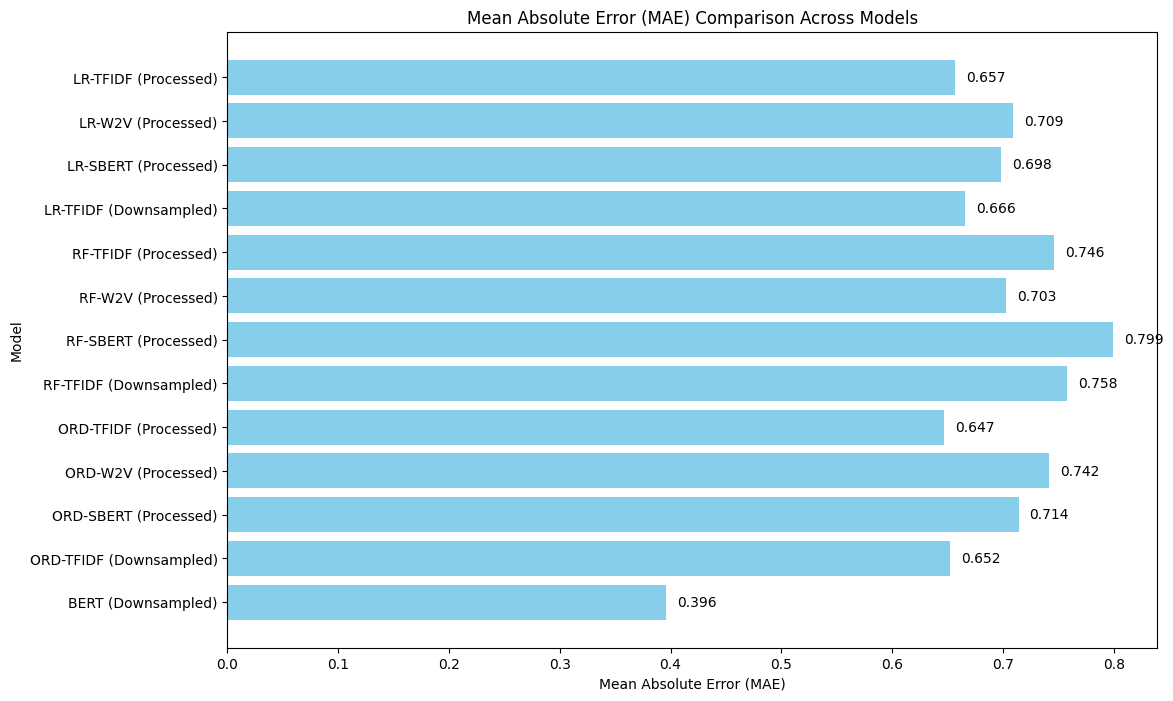

In [12]:
# Plotting Mean Absolute Error (MAE) Scores
plt.figure(figsize=(12, 8))
model_names = list(results_mae.keys())
mae_scores = list(results_mae.values())
plt.barh(model_names, mae_scores, color='skyblue')
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Model")
plt.title("Mean Absolute Error (MAE) Comparison Across Models")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Annotate each bar with its MAE value
for i, v in enumerate(mae_scores):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center')

plt.show()


## Using Weighted F1-Score

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to evaluate traditional ML models with MSE
def evaluate_traditional_model_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Function to evaluate deep learning models (LSTM and BERT) with MSE
def evaluate_deep_model_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
    return mean_squared_error(y_test, y_pred_classes)

# Function to evaluate BERT models using data loaders with MSE
def evaluate_bert_model_mse(bert_model, test_loader):
    bert_model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to("cpu") for x in batch]
            outputs = bert_model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return mean_squared_error(all_labels, all_preds)

# Initialize results dictionary for MSE
results_mse = {}

# Evaluate Logistic Regression Models with MSE
results_mse["LR-TFIDF (Processed)"] = evaluate_traditional_model_mse(lr_tfidf_processed, X_test_tfidf_processed, y_test_tfidf_processed)
results_mse["LR-W2V (Processed)"] = evaluate_traditional_model_mse(lr_w2v_processed, X_test_w2v_processed, y_test_w2v_processed)
results_mse["LR-SBERT (Processed)"] = evaluate_traditional_model_mse(lr_sbert_processed, X_test_sbert_processed, y_test_sbert_processed)
results_mse["LR-TFIDF (Downsampled)"] = evaluate_traditional_model_mse(lr_tfidf_downsampled, X_test_tfidf_downsampled, y_test_tfidf_downsampled)

# Evaluate Random Forest Models with MSE
results_mse["RF-TFIDF (Processed)"] = evaluate_traditional_model_mse(rf_tfidf_processed, X_test_tfidf_processed, y_test_tfidf_processed)
results_mse["RF-W2V (Processed)"] = evaluate_traditional_model_mse(rf_w2v_processed, X_test_w2v_processed, y_test_w2v_processed)
results_mse["RF-SBERT (Processed)"] = evaluate_traditional_model_mse(rf_sbert_processed, X_test_sbert_processed, y_test_sbert_processed)
results_mse["RF-TFIDF (Downsampled)"] = evaluate_traditional_model_mse(rf_tfidf_downsampled, X_test_tfidf_downsampled, y_test_tfidf_downsampled)

# Evaluate ORD Models with MSE
results_mse["ORD-TFIDF (Processed)"] = evaluate_traditional_model_mse(ord_tfidf_processed, X_test_tfidf_processed, y_test_tfidf_processed)
results_mse["ORD-W2V (Processed)"] = evaluate_traditional_model_mse(ord_w2v_processed, X_test_w2v_processed, y_test_w2v_processed)
results_mse["ORD-SBERT (Processed)"] = evaluate_traditional_model_mse(ord_sbert_processed, X_test_sbert_processed, y_test_sbert_processed)
results_mse["ORD-TFIDF (Downsampled)"] = evaluate_traditional_model_mse(ord_tfidf_downsampled, X_test_tfidf_downsampled, y_test_tfidf_downsampled)

# Evaluate LSTM Models with MSE
# results_mse["LSTM (Processed)"] = evaluate_deep_model_mse(lstm_processed, X_test_lstm_processed, y_test_lstm_processed)
# results_mse["LSTM (Downsampled)"] = evaluate_deep_model_mse(lstm_downsampled, X_test_lstm_downsampled, y_test_lstm_downsampled)

# Evaluate BERT Models with MSE
# results_mse["BERT (Processed)"] = evaluate_bert_model_mse(bert_processed, test_loader_bert_processed)
results_mse["BERT (Downsampled)"] = evaluate_bert_model_mse(bert_downsampled, test_loader_bert_downsampled)


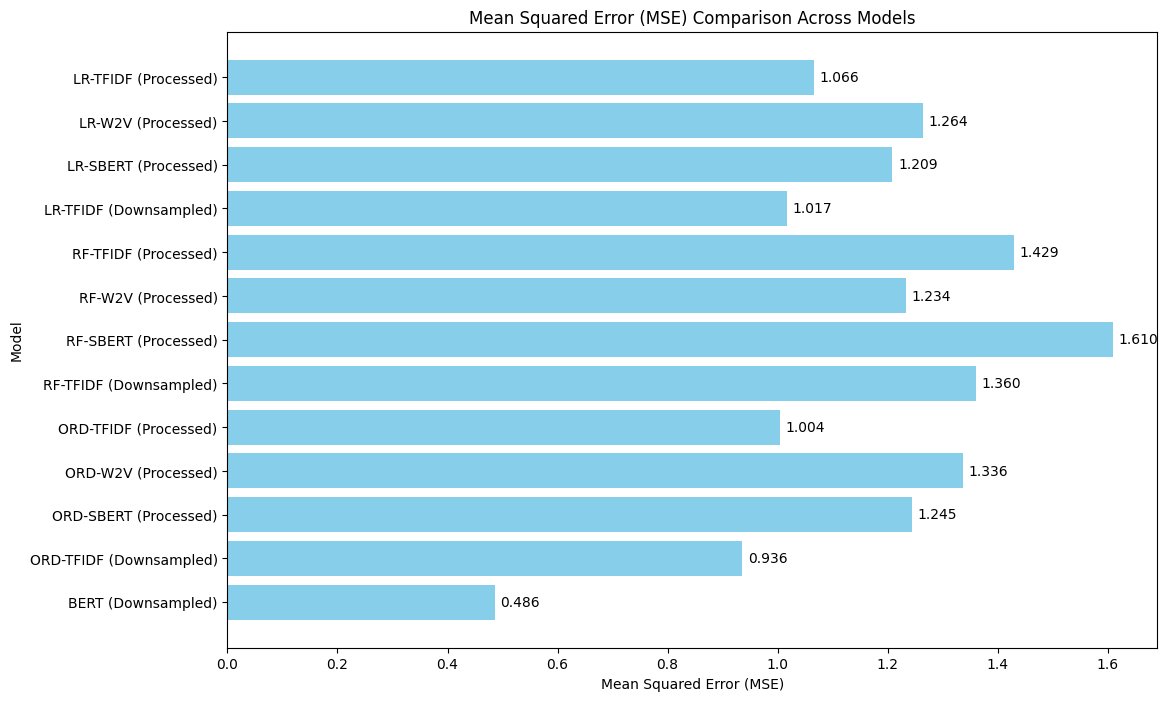

In [13]:
# Plotting Mean Absolute Error (MAE) Scores
plt.figure(figsize=(12, 8))
model_names = list(results_mse.keys())
mse_scores = list(results_mse.values())
plt.barh(model_names, mse_scores, color='skyblue')
plt.xlabel("Mean Squared Error (MSE)")
plt.ylabel("Model")
plt.title("Mean Squared Error (MSE) Comparison Across Models")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Annotate each bar with its MAE value
for i, v in enumerate(mse_scores):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center')

plt.show()
